In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#!sudo pip install seaborn

In [14]:
data = pd.read_csv("dataset.csv")
display(data.head())


,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [15]:
# Рассчитаем engagement как сумму всех явных активностей (like, comment, share_to_message)
data['engagement'] = data['like'] + data['comment'] + data['hide'] + data['expand'] + data['open_photo'] + data['share_to_message'] + data['open']

# Рассчитаем целевую переменную: отношение engagement к числу просмотров (view)
data['engagement_conversion'] = data['engagement'] / data['view']
# Заменим возможные NaN (если view = 0) на 0
data['engagement_conversion'] = data['engagement_conversion'].fillna(0)

data['text'] = data['text'].fillna(" ")
data = data.dropna(subset=['text', 'photo'])


In [16]:
data['engagement_conversion'].describe()

count    23527.000000
mean         0.126391
std          0.117845
min          0.000508
25%          0.044627
50%          0.090710
75%          0.170607
max          1.801593
Name: engagement_conversion, dtype: float64

<Axes: xlabel='engagement_conversion', ylabel='Density'>

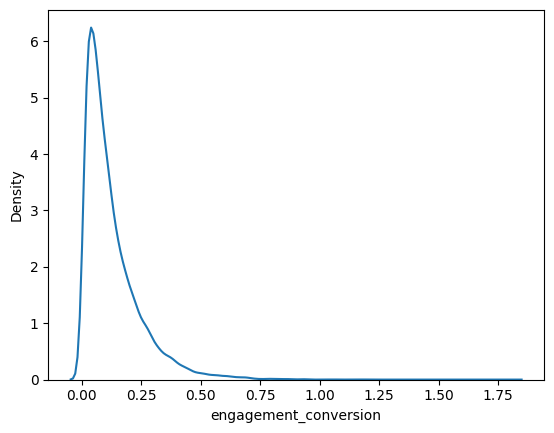

In [17]:
sns.kdeplot(data['engagement_conversion'])

In [39]:
# Выбираем устройство: GPU, если доступно, иначе CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используемое устройство: {device}")


Используемое устройство: cuda


In [18]:
data

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,engagement,engagement_conversion
0,10869,185,0,2,0,1947,14,20,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2168,0.199466
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1222,0.134537
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1188,0.221973
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,772,0.181221
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1263,0.222516
...,...,...,...,...,...,...,...,...,...,...,...,...
23522,14146,355,123,6,7,146,957,1,"Тамара, выиграет в 24 сезоне ?",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1595,0.112753
23523,13392,11,0,3,555,52,106,9,Продажи Manor Lords превысили 1 млн копий. <br...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,736,0.054958
23524,21408,1611,9,3,0,453,582,122,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2780,0.129858
23525,65138,269,14,69,2036,172,2390,116,Магическая фраза: Уже оплачено&#33;<br><br>Поз...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,5066,0.077773


In [34]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

In [35]:
#!sudo pip install torchvision --extra-index-url https://download.pytorch.org/whl/cu113

In [40]:
# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['engagement_conversion'], test_size=0.2, random_state=42)

# Проверяем длины
print(f'X_train length: {len(X_train)}, y_train length: {len(y_train)}')

# Определяем Dataset для BERT
class TextDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts.tolist()  # Убедитесь, что texts — это список
        self.targets = targets.tolist()  # Убедитесь, что targets — это список
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        target = self.targets[idx]

        # Проверяем, что text является строкой
        if not isinstance(text, str):
            raise ValueError(f"Expected a string for text but got {type(text)}")

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_tensors='pt',
            truncation=True
        )

        return {
            'input_ids': encoding['input_ids'].flatten().to(device),
            'attention_mask': encoding['attention_mask'].flatten().to(device),
            'target': torch.tensor(target, dtype=torch.float).to(device)
        }

# Функция для обучения модели
def train_bert(X_train, y_train):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1).to(device)
    
    train_dataset = TextDataset(X_train, y_train, tokenizer, max_len=128)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    model.train()
    
    for epoch in range(3):
        print(f"Epoch {epoch + 1}/{3}")
        for batch in tqdm(train_loader, desc="Training"):
            optimizer.zero_grad()
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            targets = batch['target']

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = torch.nn.functional.mse_loss(outputs[0].squeeze(), targets)
            loss.backward()
            optimizer.step()

    return model

# Функция для оценки модели
def evaluate_bert(model, X_test, y_test):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model.eval()
    
    test_dataset = TextDataset(X_test, y_test, tokenizer, max_len=128)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    predictions = []
    true_values = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            targets = batch['target']

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions.extend(outputs[0].squeeze().tolist())
            true_values.extend(targets.tolist())

    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')

    plt.figure(figsize=(12, 6))
    sns.histplot(true_values, color='blue', label='True Values', kde=True, stat='density', bins=30, alpha=0.5)
    sns.histplot(predictions, color='orange', label='Predictions', kde=True, stat='density', bins=30, alpha=0.5)
    
    plt.title('Distribution of True Values and Predictions')
    plt.xlabel('Engagement Conversion')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
bert_model = train_bert(X_train, y_train)
evaluate_bert(bert_model, X_test, y_test)

X_train length: 18821, y_train length: 18821


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


Training: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [02:34<00:00,  7.61it/s]


Epoch 2/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [02:34<00:00,  7.63it/s]


Epoch 3/3


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:18<00:00, 16.18it/s]

Mean Squared Error: 0.0102
R-squared: 0.2429


## CLIP

In [41]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from PIL import Image
import io
import base64


X_train length: 18821, y_train length: 18821


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [03:59<00:00,  4.92it/s]


Epoch 2/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [03:58<00:00,  4.93it/s]


Epoch 3/3


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:34<00:00,  8.60it/s]


Mean Squared Error: 0.0113
R-squared: 0.1601


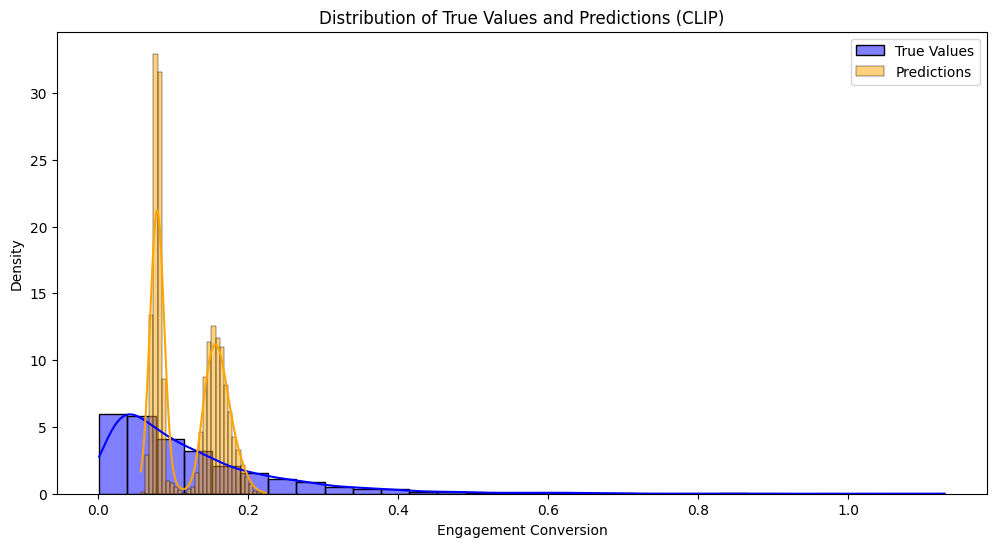

In [54]:
import torch.nn as nn
from sklearn.model_selection import train_test_split
import seaborn as sns

# Определяем устройство для вычислений
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Предполагается, что 'data' - это DataFrame с колонками 'text', 'photo' и 'engagement_conversion'

# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(
    data[['text', 'photo']], data['engagement_conversion'], test_size=0.2, random_state=42)

# Сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Проверяем длины
print(f'X_train length: {len(X_train)}, y_train length: {len(y_train)}')

# Определяем Dataset для CLIP
class CLIPDataset(Dataset):
    def __init__(self, texts, image_paths, targets):
        self.texts = texts.tolist()
        self.image_paths = image_paths.tolist()
        self.targets = targets.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        target = self.targets[idx]

        # Загрузка изображения из base64
        image_data = base64.b64decode(self.image_paths[idx])
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        return {
            'text': text,
            'image': image,
            'target': torch.tensor(target, dtype=torch.float)
        }

# Функция для объединения батчей
def collate_fn(batch):
    texts = [item['text'] for item in batch]
    images = [item['image'] for item in batch]
    targets = torch.stack([item['target'] for item in batch])

    # Обработка батча с помощью процессора
    inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation=True)

    inputs['targets'] = targets

    return inputs

# Определяем модель с регрессионной головой
class CLIPRegressionModel(nn.Module):
    def __init__(self, pretrained_model_name='openai/clip-vit-base-patch16'):
        super(CLIPRegressionModel, self).__init__()
        self.clip_model = CLIPModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(0.1)
        self.regression_head = nn.Linear(self.clip_model.config.projection_dim, 1)  # Обычно projection_dim = 512

    def forward(self, input_ids, attention_mask, pixel_values):
        outputs = self.clip_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            pixel_values=pixel_values,
            return_dict=True
        )

        # Получаем эмбеддинги
        image_embeds = outputs.image_embeds  # [batch_size, projection_dim]
        text_embeds = outputs.text_embeds    # [batch_size, projection_dim]

        # Комбинируем эмбеддинги (например, усредняем)
        combined_embeds = (image_embeds + text_embeds) / 2
        combined_embeds = self.dropout(combined_embeds)
        logits = self.regression_head(combined_embeds).squeeze(-1)  # [batch_size]

        return logits

# Функция для обучения модели
def train_clip(X_train, y_train):
    global processor  # Используем глобальную переменную для доступа в collate_fn
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
    model = CLIPRegressionModel().to(device)
    
    train_dataset = CLIPDataset(X_train['text'], X_train['photo'], y_train)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    model.train()
    
    for epoch in range(3):
        print(f"Epoch {epoch + 1}/3")
        for batch in tqdm(train_loader, desc="Training"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            targets = batch['targets'].to(device)

            logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )

            loss = torch.nn.functional.mse_loss(logits, targets)
            loss.backward()
            optimizer.step()
    
    return model

# Функция для оценки модели
def evaluate_clip(model, X_test, y_test):
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
    model.eval()
    
    test_dataset = CLIPDataset(X_test['text'], X_test['photo'], y_test)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

    predictions = []
    true_values = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            targets = batch['targets'].to(device)

            logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )

            predictions.extend(logits.cpu().numpy())
            true_values.extend(targets.cpu().numpy())

    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')

    # Визуализация распределений
    plt.figure(figsize=(12, 6))
    sns.histplot(true_values, color='blue', label='True Values', kde=True, stat='density', bins=30, alpha=0.5)
    sns.histplot(predictions, color='orange', label='Predictions', kde=True, stat='density', bins=30, alpha=0.5)
    
    plt.title('Distribution of True Values and Predictions (CLIP)')
    plt.xlabel('Engagement Conversion')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Пример использования
clip_model = train_clip(X_train, y_train)
evaluate_clip(clip_model, X_test, y_test)


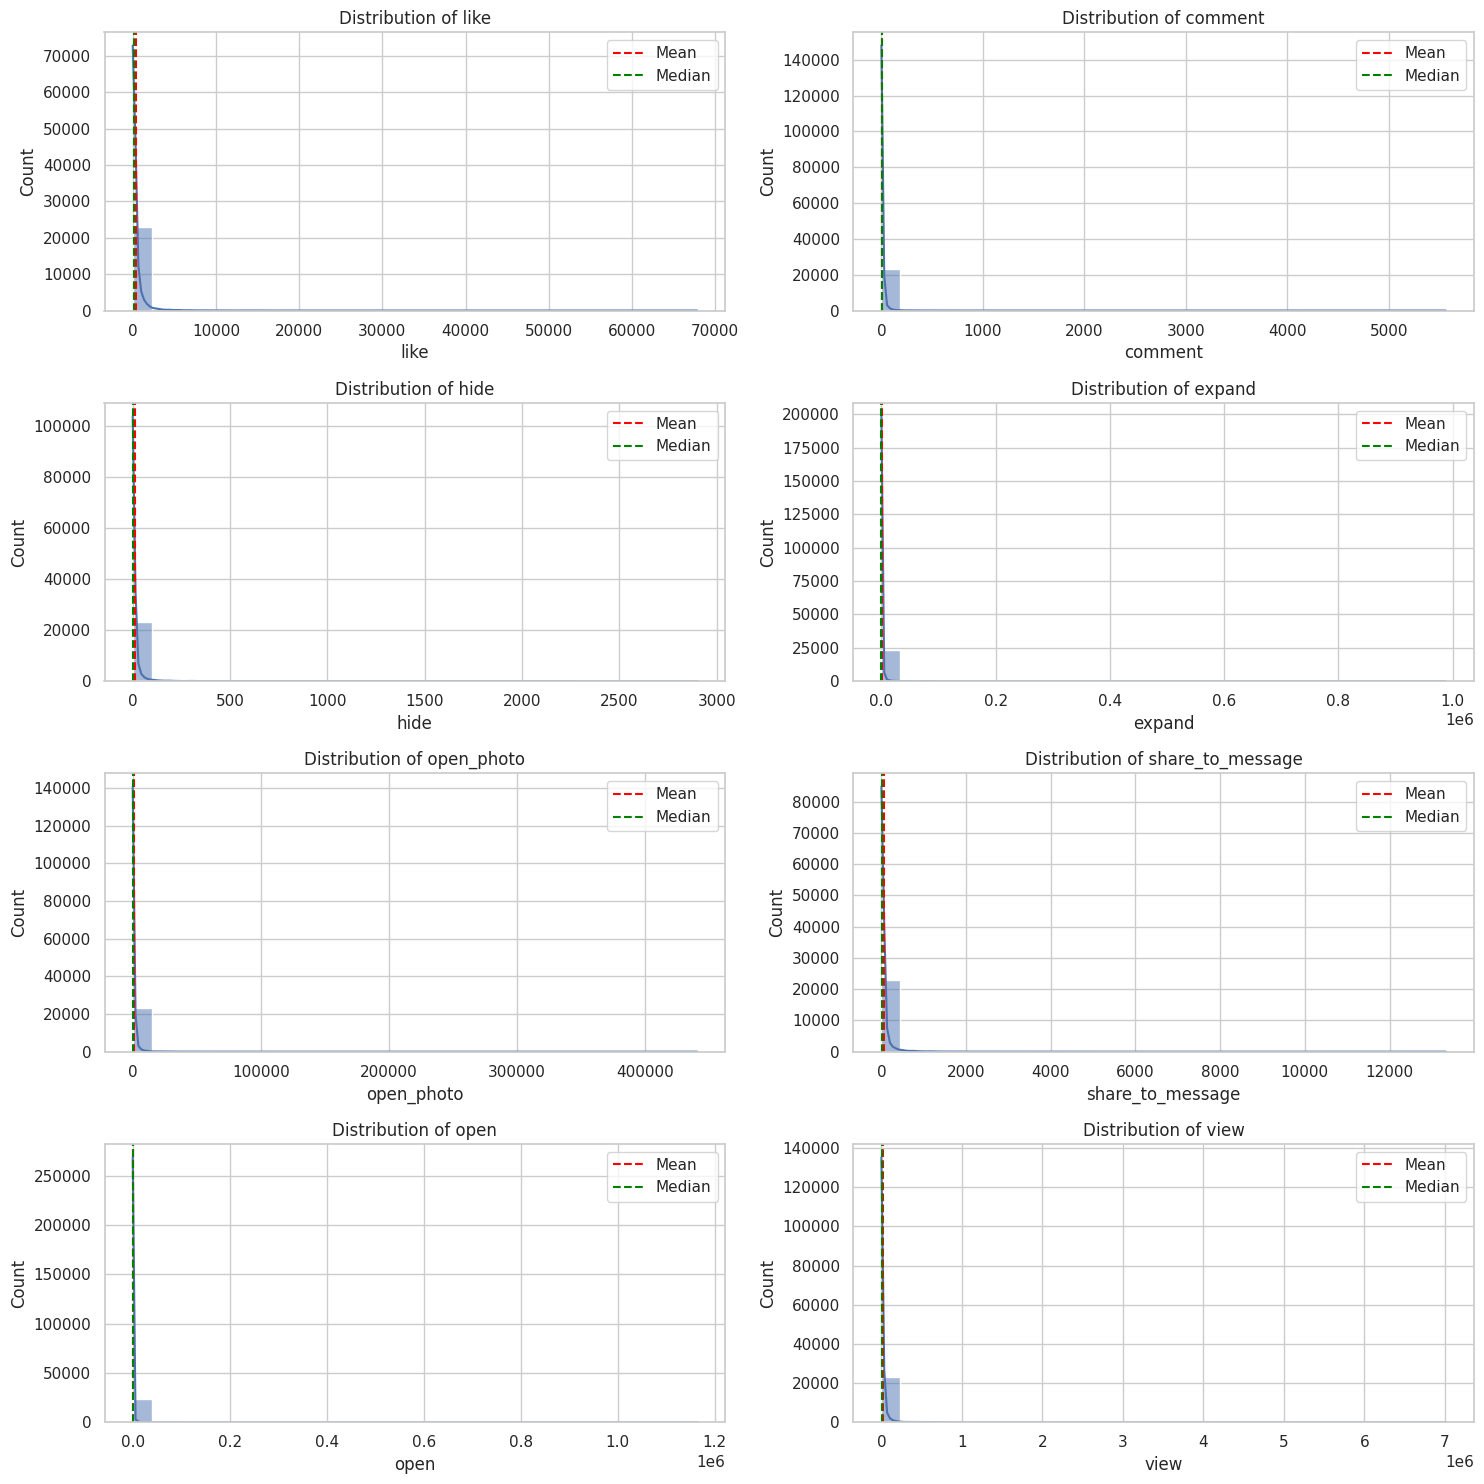

In [55]:
import seaborn as sns

# Задаем стиль графиков
sns.set(style="whitegrid")

# Создание подграфиков для каждого признака
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
features = ['like', 'comment', 'hide', 'expand', 'open_photo', 'share_to_message', 'open', 'view']

for ax, feature in zip(axes.flatten(), features):
    sns.histplot(np.log1p(data[feature]), bins=30, kde=True, ax=ax)
    ax.axvline(np.log1p(data[feature].mean()), color='red', linestyle='--', label='Mean')
    ax.axvline(np.log1p(data[feature].median()), color='green', linestyle='--', label='Median')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


In [56]:
thresholds_z = {feature: data[feature].mean() + 1.5 * data[feature].std() for feature in features}

In [57]:
thresholds_z

{'like': 2553.512743283491,
 'comment': 115.37031418838826,
 'hide': 81.86960465721408,
 'expand': 16759.936154078892,
 'open_photo': 9987.050963043637,
 'share_to_message': 488.82672930744855,
 'open': 14657.57714043646,
 'view': 139497.94905087986}

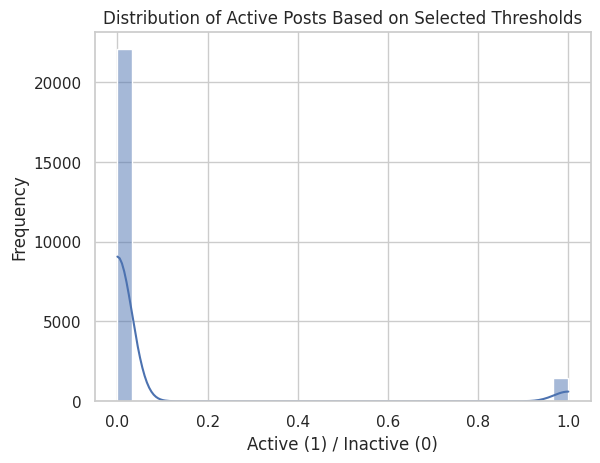

In [58]:
# Создание бинарного признака активности на основе выбранных порогов
data['active'] = (
    (data['like'] > thresholds_z['like']) |
    (data['comment'] > thresholds_z['comment']) |
    (data['hide'] > thresholds_z['hide']) |
    (data['expand'] > thresholds_z['expand']) |
    (data['open_photo'] > thresholds_z['open_photo']) |
    (data['share_to_message'] > thresholds_z['share_to_message']) |
    (data['open'] > thresholds_z['open']) |
    (data['view'] > thresholds_z['view'])
).astype(int)

# Визуализация
sns.histplot(data['active'], kde=True, bins=30)
plt.title('Distribution of Active Posts Based on Selected Thresholds')
plt.xlabel('Active (1) / Inactive (0)')
plt.ylabel('Frequency')
plt.show()


In [59]:
class_balance = data['active'].value_counts(normalize=True) * 100
class_balance

active
0    93.739108
1     6.260892
Name: proportion, dtype: float64

X_train length: 18821, y_train length: 18821


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [05:09<00:00,  3.80it/s]


Loss: 0.6868
Epoch 2/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [05:10<00:00,  3.79it/s]


Loss: 0.6828
Epoch 3/3


Training: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1177/1177 [05:09<00:00,  3.80it/s]


Loss: 0.6730


Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 295/295 [00:34<00:00,  8.43it/s]


Accuracy: 0.2272
Precision: 0.0691
Recall: 0.9085
F1-Score: 0.1284
ROC AUC: 0.5450


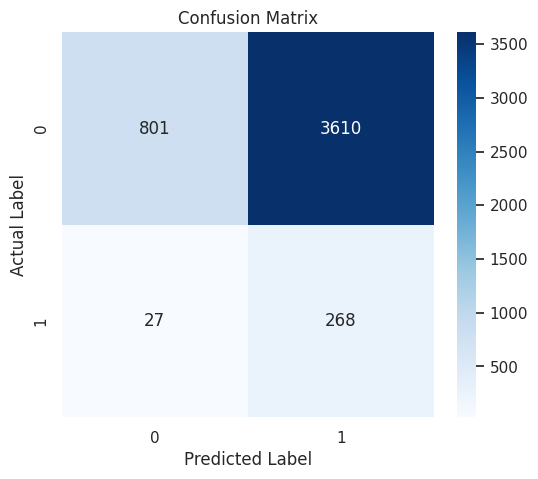

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем устройство для вычислений
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Предполагается, что 'data' - это DataFrame с колонками 'text', 'photo' и 'active'

# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(
    data[['text', 'photo']], data['active'], test_size=0.2, random_state=42, stratify=data['active'])

# Сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Проверяем длины
print(f'X_train length: {len(X_train)}, y_train length: {len(y_train)}')

# Определяем Dataset для CLIP
class CLIPDataset(Dataset):
    def __init__(self, texts, image_paths, targets):
        self.texts = texts.tolist()
        self.image_paths = image_paths.tolist()
        self.targets = targets.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        target = self.targets[idx]

        # Загрузка изображения из base64
        image_data = base64.b64decode(self.image_paths[idx])
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        return {
            'text': text,
            'image': image,
            'target': torch.tensor(target, dtype=torch.float)
        }

# Функция для объединения батчей
def collate_fn(batch):
    texts = [item['text'] for item in batch]
    images = [item['image'] for item in batch]
    targets = torch.stack([item['target'] for item in batch])

    # Обработка батча с помощью процессора
    inputs = processor(text=texts, images=images, return_tensors="pt", padding=True, truncation=True)

    inputs['targets'] = targets

    return inputs

# Определяем модель с классификационной головой
class CLIPClassificationModel(nn.Module):
    def __init__(self, pretrained_model_name='openai/clip-vit-base-patch16'):
        super(CLIPClassificationModel, self).__init__()
        self.clip_model = CLIPModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(0.1)
        self.classification_head = nn.Linear(self.clip_model.config.projection_dim, 1)  # Обычно projection_dim = 512

    def forward(self, input_ids, attention_mask, pixel_values):
        outputs = self.clip_model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            pixel_values=pixel_values,
            return_dict=True
        )

        # Получаем эмбеддинги
        image_embeds = outputs.image_embeds  # [batch_size, projection_dim]
        text_embeds = outputs.text_embeds    # [batch_size, projection_dim]

        # Комбинируем эмбеддинги (например, усредняем)
        combined_embeds = (image_embeds + text_embeds) / 2
        combined_embeds = self.dropout(combined_embeds)
        logits = self.classification_head(combined_embeds).squeeze(-1)  # [batch_size]

        return logits

# Функция для обучения модели
def train_clip(X_train, y_train):
    global processor  # Используем глобальную переменную для доступа в collate_fn
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
    model = CLIPClassificationModel().to(device)
    
    train_dataset = CLIPDataset(X_train['text'], X_train['photo'], y_train)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)

    # Учитываем дисбаланс классов
    class_counts = y_train.value_counts().tolist()
    class_weights = [len(y_train) / c for c in class_counts]
    weights = [class_weights[int(t)] for t in y_train]
    sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)
    train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, collate_fn=collate_fn)

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    criterion = nn.BCEWithLogitsLoss()
    model.train()
    
    for epoch in range(3):
        print(f"Epoch {epoch + 1}/3")
        running_loss = 0.0
        for batch in tqdm(train_loader, desc="Training"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            targets = batch['targets'].to(device)

            logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )

            loss = criterion(logits, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Loss: {running_loss/len(train_loader):.4f}")
    
    return model

# Функция для оценки модели
def evaluate_clip(model, X_test, y_test):
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
    model.eval()
    
    test_dataset = CLIPDataset(X_test['text'], X_test['photo'], y_test)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

    predictions = []
    true_values = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            targets = batch['targets'].to(device)

            logits = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                pixel_values=pixel_values
            )

            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()

            predictions.extend(preds.cpu().numpy())
            true_values.extend(targets.cpu().numpy())

    accuracy = accuracy_score(true_values, predictions)
    precision = precision_score(true_values, predictions, zero_division=0)
    recall = recall_score(true_values, predictions)
    f1 = f1_score(true_values, predictions)
    roc_auc = roc_auc_score(true_values, predictions)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Визуализация матрицы ошибок
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(true_values, predictions)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Пример использования
clip_model = train_clip(X_train, y_train)
evaluate_clip(clip_model, X_test, y_test)


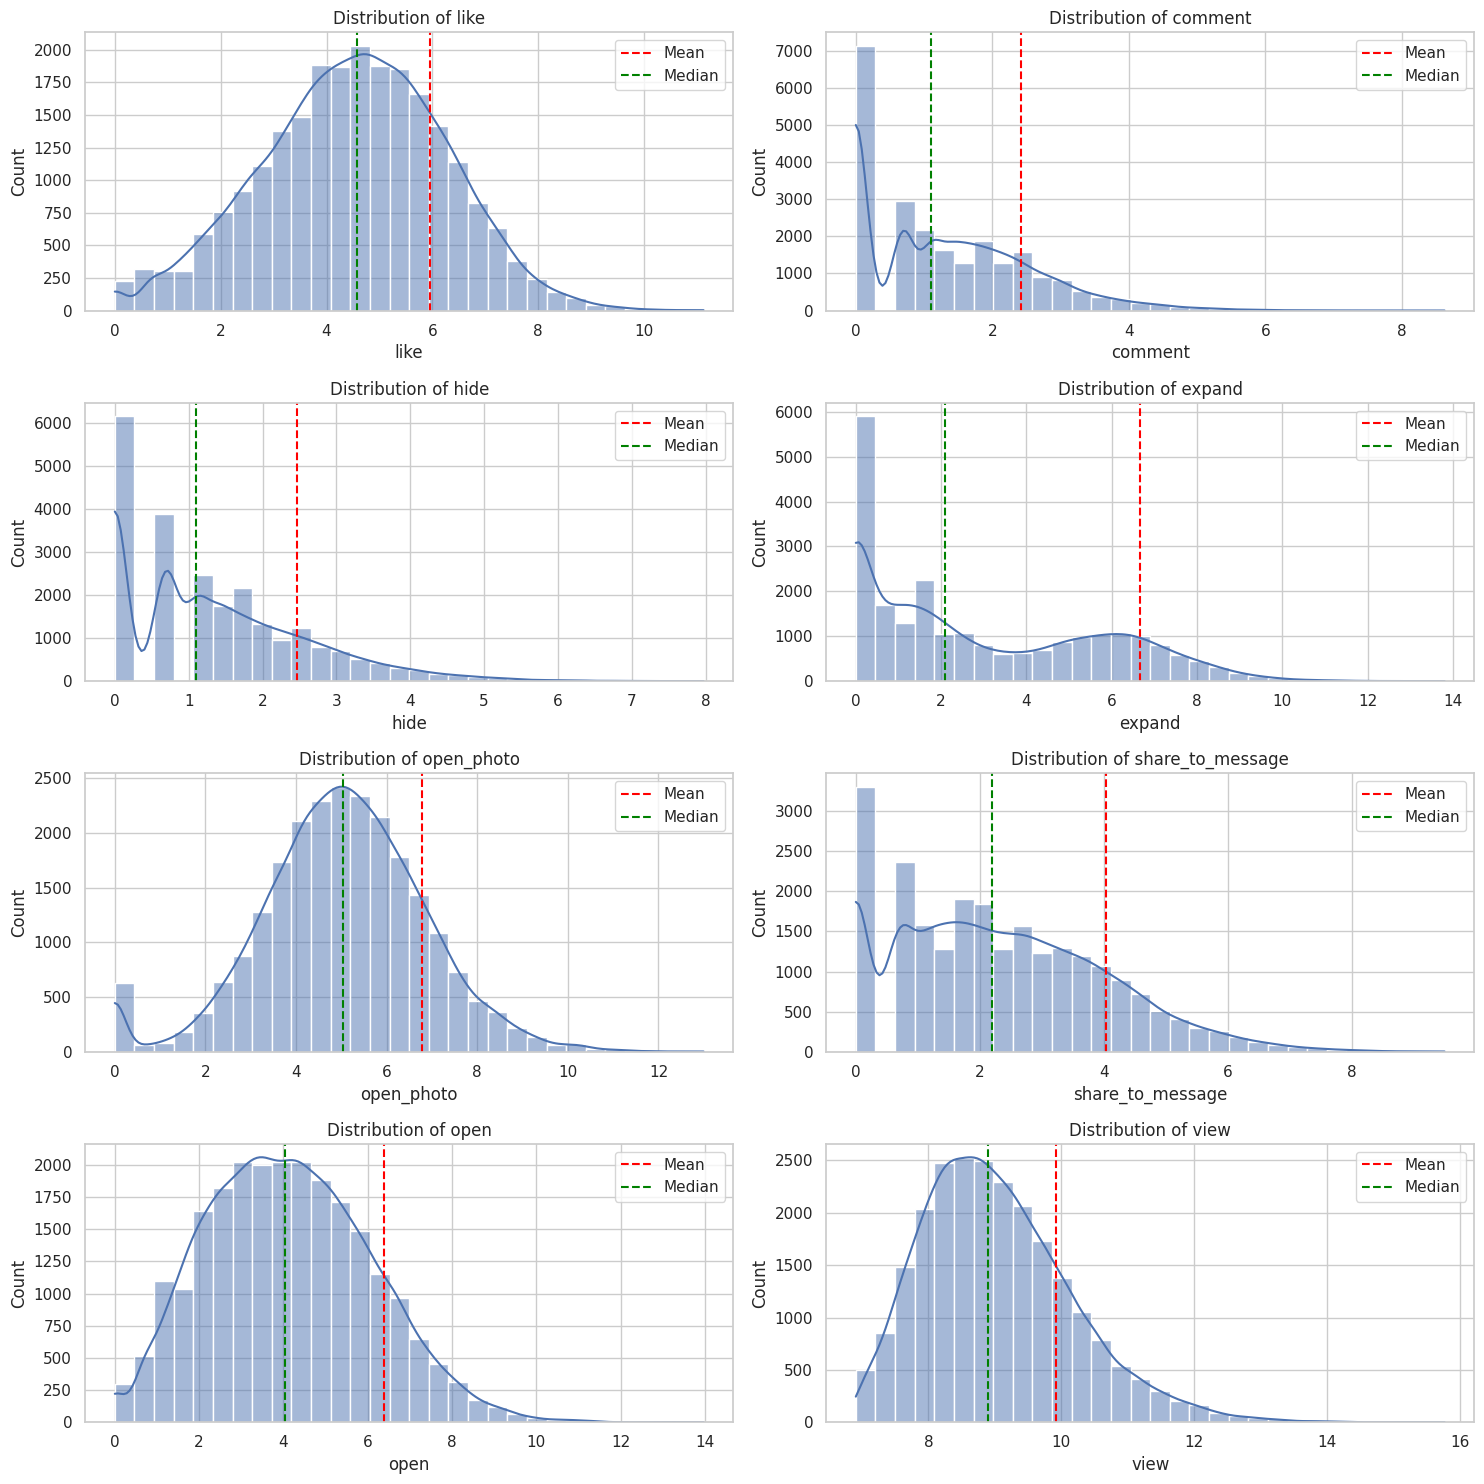

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем стиль графиков
sns.set(style="whitegrid")

# Создание подграфиков для каждого признака
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
features = ['like', 'comment', 'hide', 'expand', 'open_photo', 'share_to_message', 'open', 'view']

for ax, feature in zip(axes.flatten(), features):
    sns.histplot(np.log1p(data[feature]), bins=30, kde=True, ax=ax)
    ax.axvline(np.log1p(data[feature].mean()), color='red', linestyle='--', label='Mean')
    ax.axvline(np.log1p(data[feature].median()), color='green', linestyle='--', label='Median')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


In [70]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from transformers import LxmertTokenizer, LxmertModel, LxmertConfig
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Размер обучающей выборки: 18821
Размер тестовой выборки: 4706


Some weights of the model checkpoint at unc-nlp/lxmert-base-uncased were not used when initializing LxmertModel: ['answer_head.logit_fc.0.bias', 'answer_head.logit_fc.0.weight', 'answer_head.logit_fc.2.bias', 'answer_head.logit_fc.2.weight', 'answer_head.logit_fc.3.bias', 'answer_head.logit_fc.3.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'obj_predict_head.decoder_dict.attr.bias', 'obj_predict_head.decoder_dict.attr.weight', 'obj_predict_head.decoder_dict.feat.bias', 'obj_predict_head.decoder_dict.feat.weight', 'obj_predict_head.decoder_dict.obj.bias', 'obj_predict_head.decoder_dict.obj.weight', 'obj_predict_head.transform.LayerNorm.bias', 'obj_predict_head.transform.LayerNorm.weight', 'obj_predict_head.transform.dense.bias', 'obj_pred

Эпоха 1/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:55<00:00,  7.95it/s]


Обучение: Потеря 0.6216, Точность 0.9180


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:26<00:00, 22.32it/s]


Валидация: Потеря 0.6011, Точность 0.9373
Precision: 0.0000, Recall: 0.0000, F1: 0.0000, ROC AUC: 0.5169
Эпоха 2/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:53<00:00,  8.02it/s]


Обучение: Потеря 0.6107, Точность 0.9264


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:26<00:00, 22.11it/s]


Валидация: Потеря 0.6159, Точность 0.9373
Precision: 0.0000, Recall: 0.0000, F1: 0.0000, ROC AUC: 0.5297
Эпоха 3/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:56<00:00,  7.94it/s]


Обучение: Потеря 0.6104, Точность 0.9263


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:26<00:00, 22.23it/s]


Валидация: Потеря 0.6158, Точность 0.7796
Precision: 0.0676, Recall: 0.1966, F1: 0.1006, ROC AUC: 0.5154


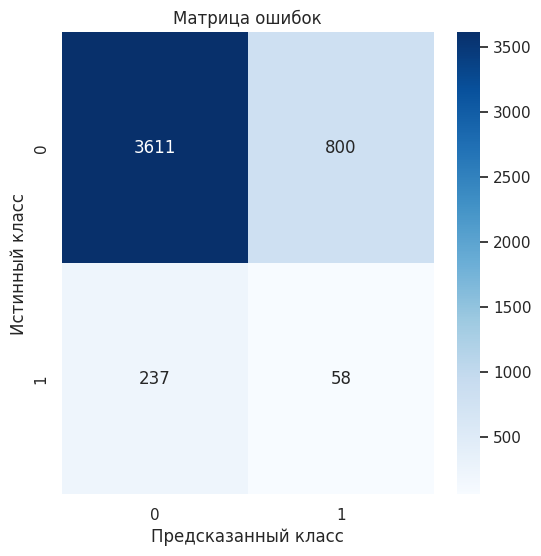

In [83]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что 'data' - это DataFrame с колонками 'text', 'photo' и 'active'

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data[['text', 'photo']], data['active'], test_size=0.2, random_state=42, stratify=data['active']
)

# Сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Проверяем размеры
print(f'Размер обучающей выборки: {len(X_train)}')
print(f'Размер тестовой выборки: {len(X_test)}')

# Инициализируем токенизатор
tokenizer = LxmertTokenizer.from_pretrained('unc-nlp/lxmert-base-uncased')

# Загрузка конфигурации модели
config = LxmertConfig.from_pretrained('unc-nlp/lxmert-base-uncased')
config.num_labels = 2  # Бинарная классификация

# Загрузка модели
lxmert_model = LxmertModel.from_pretrained('unc-nlp/lxmert-base-uncased', config=config)

# Определяем датасет
class LXMERTDataset(Dataset):
    def __init__(self, texts, images_base64, labels, tokenizer, max_length=36):
        self.texts = texts.tolist()
        self.images_base64 = images_base64.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Текстовые данные
        text = str(self.texts[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        # Изображение
        image_data = base64.b64decode(self.images_base64[idx])
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Для простоты используем нулевые тензоры как заглушки для визуальных признаков
        visual_feats = torch.zeros((36, 2048), dtype=torch.float32)  # Заглушка для визуальных признаков
        visual_pos = torch.zeros((36, 4), dtype=torch.float32)       # Заглушка для позиций объектов

        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'token_type_ids': encoding['token_type_ids'].squeeze(0),
            'visual_feats': visual_feats,
            'visual_pos': visual_pos,
            'label': label
        }

# Определяем модель с классификационной головой
class LXMERTForClassification(nn.Module):
    def __init__(self, lxmert_model):
        super(LXMERTForClassification, self).__init__()
        self.lxmert = lxmert_model
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.lxmert.config.hidden_size, 2)  # Бинарная классификация

    def forward(self, input_ids, attention_mask, token_type_ids, visual_feats, visual_pos):
        outputs = self.lxmert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_feats=visual_feats,
            visual_pos=visual_pos,
            output_attentions=False,
            output_hidden_states=False,
            return_dict=True
        )
        pooled_output = outputs['pooled_output']  # Исправлено название ключа
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

# Инициализируем модель
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LXMERTForClassification(lxmert_model).to(device)

# Создаем экземпляры датасета
train_dataset = LXMERTDataset(
    texts=X_train['text'],
    images_base64=X_train['photo'],
    labels=y_train,
    tokenizer=tokenizer
)

test_dataset = LXMERTDataset(
    texts=X_test['text'],
    images_base64=X_test['photo'],
    labels=y_test,
    tokenizer=tokenizer
)

# Создаем DataLoader'ы
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Вычисляем веса классов
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Определяем функцию потерь с учетом весов классов
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Оптимизатор
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)

# Функция обучения
def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, desc="Обучение"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        visual_feats = batch['visual_feats'].to(device)
        visual_pos = batch['visual_pos'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_feats=visual_feats,
            visual_pos=visual_pos
        )

        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Функция оценки
def eval_model(model, data_loader, criterion, device):
    model.eval()
    losses = []
    correct_predictions = 0

    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Оценка"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            visual_feats = batch['visual_feats'].to(device)
            visual_pos = batch['visual_pos'].to(device)
            labels = batch['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_feats=visual_feats,
                visual_pos=visual_pos
            )

            loss = criterion(outputs, labels)
            probs = nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(probs, dim=1)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    return accuracy, np.mean(losses), all_labels, all_preds, all_probs

# Цикл обучения и оценки
EPOCHS = 3

for epoch in range(EPOCHS):
    print(f'Эпоха {epoch + 1}/{EPOCHS}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f'Обучение: Потеря {train_loss:.4f}, Точность {train_acc:.4f}')

    val_acc, val_loss, val_labels, val_preds, val_probs = eval_model(model, test_loader, criterion, device)
    print(f'Валидация: Потеря {val_loss:.4f}, Точность {val_acc:.4f}')

    # Метрики
    precision = precision_score(val_labels, val_preds, zero_division=0)
    recall = recall_score(val_labels, val_preds, zero_division=0)
    f1 = f1_score(val_labels, val_preds, zero_division=0)
    roc_auc = roc_auc_score(val_labels, val_probs)

    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}')

# Визуализация матрицы ошибок
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()


Размер обучающей выборки: 18821
Размер тестовой выборки: 4706


Some weights of the model checkpoint at unc-nlp/lxmert-base-uncased were not used when initializing LxmertModel: ['answer_head.logit_fc.0.bias', 'answer_head.logit_fc.0.weight', 'answer_head.logit_fc.2.bias', 'answer_head.logit_fc.2.weight', 'answer_head.logit_fc.3.bias', 'answer_head.logit_fc.3.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'obj_predict_head.decoder_dict.attr.bias', 'obj_predict_head.decoder_dict.attr.weight', 'obj_predict_head.decoder_dict.feat.bias', 'obj_predict_head.decoder_dict.feat.weight', 'obj_predict_head.decoder_dict.obj.bias', 'obj_predict_head.decoder_dict.obj.weight', 'obj_predict_head.transform.LayerNorm.bias', 'obj_predict_head.transform.LayerNorm.weight', 'obj_predict_head.transform.dense.bias', 'obj_pred

Эпоха 1/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:54<00:00,  8.00it/s]


Обучение: Потеря 0.0255


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.72it/s]


Валидация: Потеря 0.0134
MSE: 0.0134, MAE: 0.0815, R^2: 0.0056
Эпоха 2/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [05:06<00:00,  7.66it/s]


Обучение: Потеря 0.0179


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.73it/s]


Валидация: Потеря 0.0133
MSE: 0.0133, MAE: 0.0770, R^2: 0.0171
Эпоха 3/3


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:52<00:00,  8.05it/s]


Обучение: Потеря 0.0161


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.42it/s]


Валидация: Потеря 0.0128
MSE: 0.0128, MAE: 0.0769, R^2: 0.0498


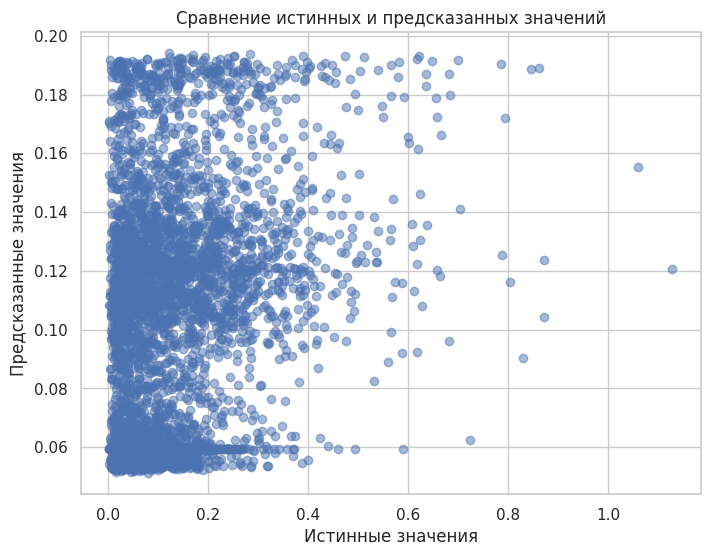

In [84]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import LxmertTokenizer, LxmertModel, LxmertConfig
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что 'data' - это DataFrame с колонками 'text', 'photo' и 'engagement_conversion' (ваш новый таргет для регрессии)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data[['text', 'photo']],
    data['engagement_conversion'],  # Измените на ваш числовой таргет
    test_size=0.2,
    random_state=42
)

# Сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Проверяем размеры
print(f'Размер обучающей выборки: {len(X_train)}')
print(f'Размер тестовой выборки: {len(X_test)}')

# Инициализируем токенизатор
tokenizer = LxmertTokenizer.from_pretrained('unc-nlp/lxmert-base-uncased')

# Загрузка конфигурации модели
config = LxmertConfig.from_pretrained('unc-nlp/lxmert-base-uncased')

# Загрузка модели
lxmert_model = LxmertModel.from_pretrained('unc-nlp/lxmert-base-uncased', config=config)

# Определяем датасет
class LXMERTRegressionDataset(Dataset):
    def __init__(self, texts, images_base64, targets, tokenizer, max_length=36):
        self.texts = texts.tolist()
        self.images_base64 = images_base64.tolist()
        self.targets = targets.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Текстовые данные
        text = str(self.texts[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        # Изображение
        image_data = base64.b64decode(self.images_base64[idx])
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Для простоты используем нулевые тензоры как заглушки для визуальных признаков
        visual_feats = torch.zeros((36, 2048), dtype=torch.float32)  # Заглушка для визуальных признаков
        visual_pos = torch.zeros((36, 4), dtype=torch.float32)       # Заглушка для позиций объектов

        target = torch.tensor(self.targets[idx], dtype=torch.float)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'token_type_ids': encoding['token_type_ids'].squeeze(0),
            'visual_feats': visual_feats,
            'visual_pos': visual_pos,
            'target': target
        }

# Определяем модель для регрессии
class LXMERTForRegression(nn.Module):
    def __init__(self, lxmert_model):
        super(LXMERTForRegression, self).__init__()
        self.lxmert = lxmert_model
        self.dropout = nn.Dropout(0.1)
        self.regressor = nn.Linear(self.lxmert.config.hidden_size, 1)  # Выходной слой для регрессии

    def forward(self, input_ids, attention_mask, token_type_ids, visual_feats, visual_pos):
        outputs = self.lxmert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_feats=visual_feats,
            visual_pos=visual_pos,
            output_attentions=False,
            output_hidden_states=False,
            return_dict=True
        )
        pooled_output = outputs['pooled_output']
        pooled_output = self.dropout(pooled_output)
        logits = self.regressor(pooled_output).squeeze(-1)  # Изменение здесь
        return logits

# Инициализируем модель
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LXMERTForRegression(lxmert_model).to(device)

# Создаем экземпляры датасета
train_dataset = LXMERTRegressionDataset(
    texts=X_train['text'],
    images_base64=X_train['photo'],
    targets=y_train,
    tokenizer=tokenizer
)

test_dataset = LXMERTRegressionDataset(
    texts=X_test['text'],
    images_base64=X_test['photo'],
    targets=y_test,
    tokenizer=tokenizer
)

# Создаем DataLoader'ы
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Определяем функцию потерь для регрессии
criterion = nn.MSELoss()

# Оптимизатор
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)

# Функция обучения
def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    losses = []

    for batch in tqdm(data_loader, desc="Обучение"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        visual_feats = batch['visual_feats'].to(device)
        visual_pos = batch['visual_pos'].to(device)
        targets = batch['target'].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            visual_feats=visual_feats,
            visual_pos=visual_pos
        )

        loss = criterion(outputs, targets)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return np.mean(losses)

# Функция оценки
def eval_model(model, data_loader, criterion, device):
    model.eval()
    losses = []

    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Оценка"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            visual_feats = batch['visual_feats'].to(device)
            visual_pos = batch['visual_pos'].to(device)
            targets = batch['target'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_feats=visual_feats,
                visual_pos=visual_pos
            )

            loss = criterion(outputs, targets)
            losses.append(loss.item())

            all_targets.extend(targets.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())

    return np.mean(losses), all_targets, all_outputs

# Цикл обучения и оценки
EPOCHS = 3

for epoch in range(EPOCHS):
    print(f'Эпоха {epoch + 1}/{EPOCHS}')
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f'Обучение: Потеря {train_loss:.4f}')

    val_loss, val_targets, val_outputs = eval_model(model, test_loader, criterion, device)
    print(f'Валидация: Потеря {val_loss:.4f}')

    # Метрики
    mse = mean_squared_error(val_targets, val_outputs)
    mae = mean_absolute_error(val_targets, val_outputs)
    r2 = r2_score(val_targets, val_outputs)

    print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(8,6))
plt.scatter(val_targets, val_outputs, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.show()


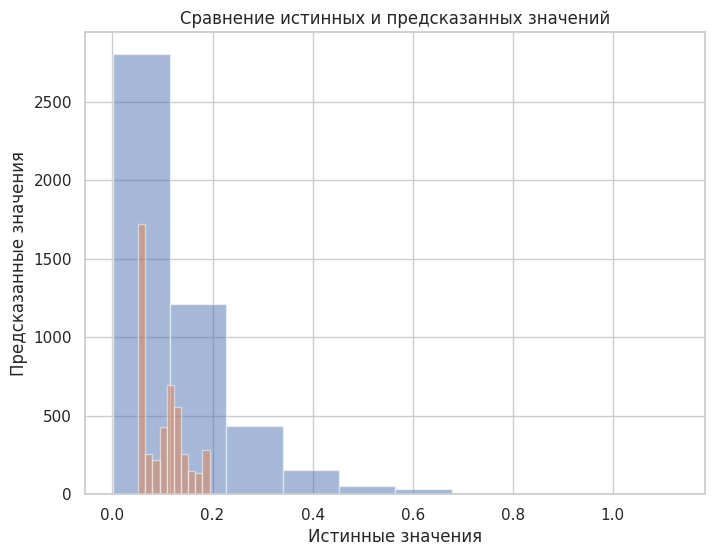

In [87]:
# Визуализация результатов
plt.figure(figsize=(8,6))
plt.hist(val_targets, alpha=0.5)
plt.hist(val_outputs, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.show()


In [ ]:
EPOCHS = 7

for epoch in range(EPOCHS):
    print(f'Эпоха {epoch + 1}/{EPOCHS}')
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f'Обучение: Потеря {train_loss:.4f}')

    val_loss, val_targets, val_outputs = eval_model(model, test_loader, criterion, device)
    print(f'Валидация: Потеря {val_loss:.4f}')

    # Метрики
    mse = mean_squared_error(val_targets, val_outputs)
    mae = mean_absolute_error(val_targets, val_outputs)
    r2 = r2_score(val_targets, val_outputs)

    print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}')


Эпоха 1/7


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:51<00:00,  8.06it/s]


Обучение: Потеря 0.0152


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.36it/s]


Валидация: Потеря 0.0125
MSE: 0.0125, MAE: 0.0774, R^2: 0.0753
Эпоха 2/7


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:52<00:00,  8.04it/s]


Обучение: Потеря 0.0148


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.61it/s]


Валидация: Потеря 0.0124
MSE: 0.0124, MAE: 0.0822, R^2: 0.0791
Эпоха 3/7


Обучение: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2353/2353 [04:50<00:00,  8.09it/s]


Обучение: Потеря 0.0154


Оценка: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 589/589 [00:27<00:00, 21.67it/s]


Валидация: Потеря 0.0132
MSE: 0.0132, MAE: 0.0828, R^2: 0.0248
Эпоха 4/7


Обучение:  29%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 685/2353 [01:24<03:06,  8.94it/s]